In [1]:
import numpy as np
import pandas as pd
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [2]:
sz=320
bs = 32
path='data/hackerearth-myntra'
arch=dn121

In [3]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.CENTER)

In [4]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=(trn_tfms,val_tfms),bs=bs)

In [5]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2)

In [6]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax
x,y=next(iter(data.trn_dl))


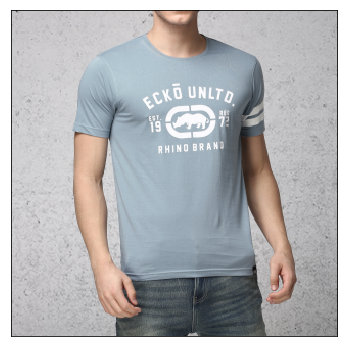

In [7]:
show_img(data.val_ds.denorm(to_np(x))[5],figsize=(6,6))

In [8]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 81%|████████  | 1384/1709 [00:15<00:03, 88.51it/s, loss=5.37]

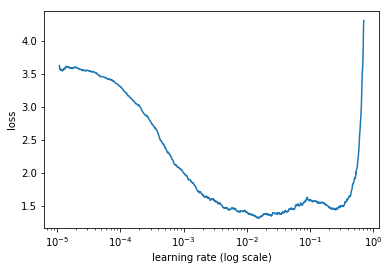

 81%|████████  | 1384/1709 [00:30<00:07, 46.09it/s, loss=5.37]

In [9]:
learn.sched.plot()

In [10]:
learn.fit(0.002,3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

 65%|██████▌   | 1111/1709 [00:09<00:05, 112.02it/s, loss=1.17]

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      1.166513   1.054503   0.692173  
    1      1.057014   1.003436   0.704147                      
    2      0.979375   0.970815   0.712763                       



[0.97081476, 0.71276285046728971]

In [11]:
learn.fit(0.002,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.953376   0.950653   0.721963  
    1      0.978481   0.941555   0.721159                       



[0.94155473, 0.7211594626168224]

In [12]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix_mine(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(12,12))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization      
[[  92    5    5    1    3   11   33   34   68    0   12    0   19    0    1   47    1    0   16    4    3
     0   99    0]
 [   3   56    0    0    0    1    1    0   13    0    1    1    6    0    0    0    0    0    0    1    0
     0   41    0]
 [   6    1   16    0    1    0    4    0    6    0    0    0    0    0    0    3    0    0    0    0    0
     0    8    0]
 [   0    0    0   23    0    0    0    8    0    0    1    0    0    0    0   10    0    0    4    0    0
     0    0    0]
 [   2    1    0    0  253    1    0    4    5    0    1    0    0    0    0  186    0    0   35    0    1
     0   24    0]
 [  12    1    0    0    0  101   21   28   25    0   12    0    2    0    0   16    0    0    1    1    0
     0   52    0]
 [  22    1    0    0    0    6  169    8   31    0    3    0    7    0    0   16    0    0    4    1    0
     0   39    0]
 [  18    0    2    3    5   19   11  168   16    0    0    0    1    0    1   

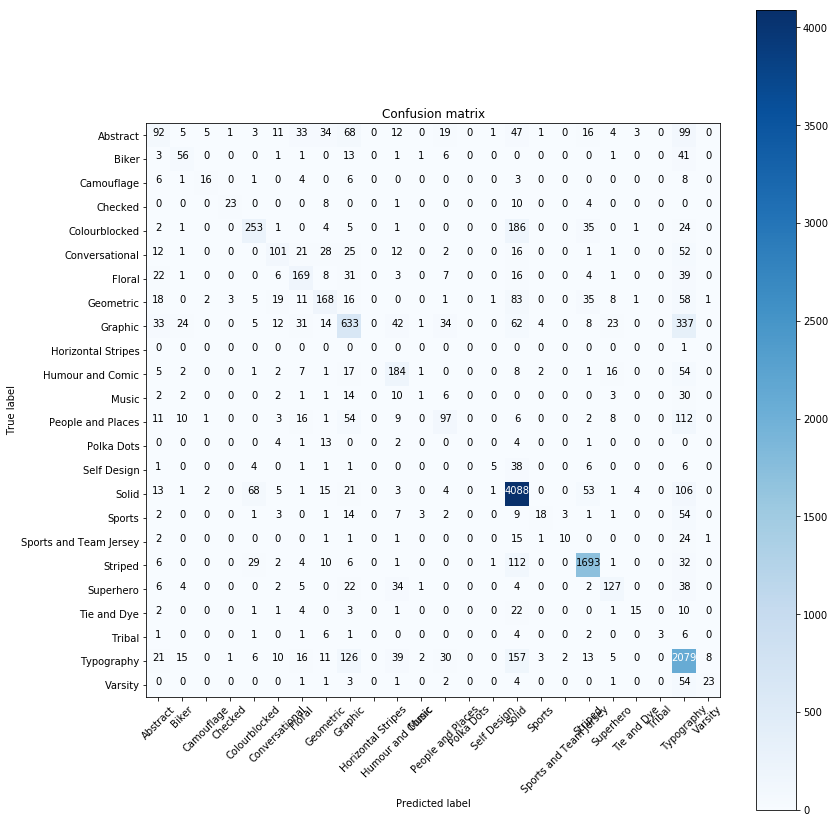

In [13]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)
y[10]=9
predictions = np.argmax(probs,axis=1)
cm = confusion_matrix(y, predictions)
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.20264  0.01101  0.01101  0.0022   0.00661  0.02423  0.07269  0.07489  0.14978  0.       0.02643  0.
   0.04185  0.       0.0022   0.10352  0.0022   0.       0.03524  0.00881  0.00661  0.       0.21806  0.     ]
 [ 0.02419  0.45161  0.       0.       0.       0.00806  0.00806  0.       0.10484  0.       0.00806  0.00806
   0.04839  0.       0.       0.       0.       0.       0.       0.00806  0.       0.       0.33065  0.     ]
 [ 0.13333  0.02222  0.35556  0.       0.02222  0.       0.08889  0.       0.13333  0.       0.       0.       0.
   0.       0.       0.06667  0.       0.       0.       0.       0.       0.       0.17778  0.     ]
 [ 0.       0.       0.       0.5      0.       0.       0.       0.17391  0.       0.       0.02174  0.       0.
   0.       0.       0.21739  0.       0.       0.08696  0.       0.       0.       0.       0.     ]
 [ 0.0039   0.00195  0.       0.       0.49318  0.00195  0.       0.0078   0.00975  0.       0.00195  0

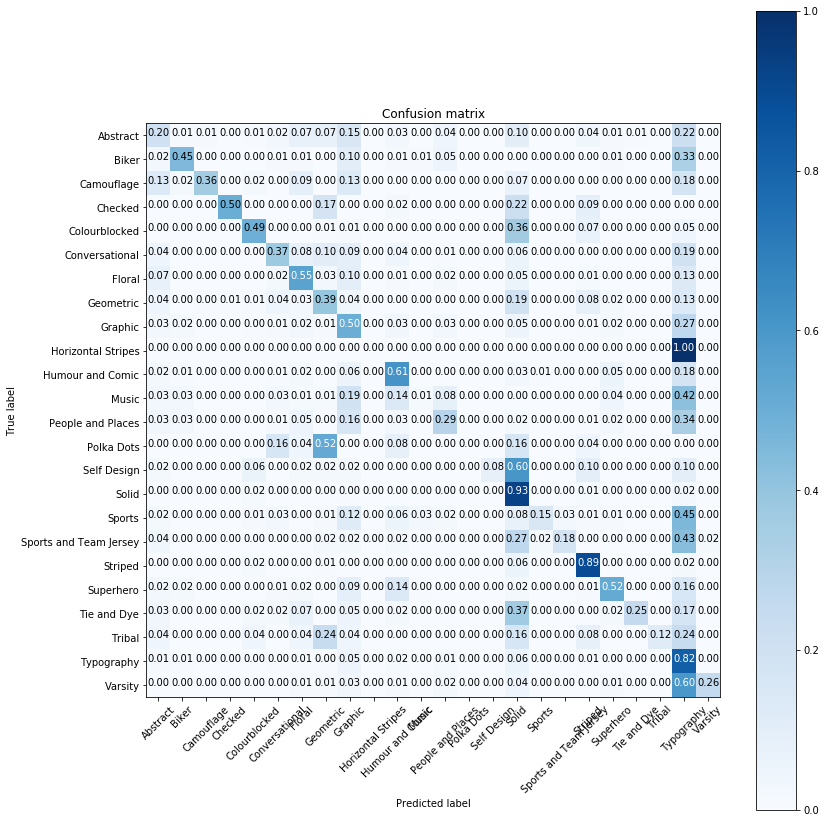

In [14]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

In [15]:
learn.precompute=False

In [ ]:
learn.fit(0.002,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

  4%|▍         | 66/1709 [00:33<14:04,  1.95it/s, loss=1.03]  

In [ ]:
arch_201=dn121
sz=600

In [ ]:
tfms= tfms_from_model(arch,sz,crop_type=CropType.NO)

In [ ]:
data_two = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=tfms,bs=bs,num_workers=2)

In [ ]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax
x,y=next(iter(data_two.val_dl))
show_img(data_two.val_ds.denorm(to_np(x))[2],figsize=(6,6))

In [ ]:
learn_no = ConvLearner.pretrained(arch_201,data_two,precompute=True,ps=0.2)

In [ ]:
learn_no.load('600x600-for-ensemble')

In [ ]:
log_preds_no,y_no = learn_no.TTA()
probs_no = np.mean(np.exp(log_preds_no),0)
accuracy_np(probs_no, y_no)
y_no[10]=9
predictions_no = np.argmax(probs_no,axis=1)
cm_no = confusion_matrix(y_no, predictions_no)


In [ ]:
plot_confusion_matrix_mine(cm_no,data_two.classes,normalize=False)

In [ ]:
probs_ensemble = probs_no + probs

In [ ]:
probs_ensemble[:2]

In [ ]:
probs_ensemble = probs_ensemble/2

In [ ]:
probs_ensemble[:2]

In [ ]:
accuracy_np(probs_ensemble, y_no)


In [ ]:
accuracy_np(probs,y_no)

In [ ]:
accuracy_np(probs_no,y_no)

In [ ]:
predictions_ensemble = np.argmax(probs_ensemble,axis=1)


In [ ]:
cm_ensemble = confusion_matrix(y_no, predictions_ensemble)


In [ ]:
plot_confusion_matrix_mine(cm_ensemble,data.classes,normalize=False)

In [ ]:
plot_confusion_matrix_mine(cm_ensemble,data.classes,normalize=True)

In [ ]:
learn.unfreeze()

In [ ]:
learn_no.unfreeze()

In [ ]:
fname = '/home/paperspace/data/hackerearth-myntra/test/11476446167866-2GO-Women-Grey-Solid-V-Neck-T-Shirt-3201476446167715-1.jpg'


In [ ]:
test = open_image(fname)
test= val_tfms((test))
test.shape

In [ ]:
pred_temp = learn.predict_array(test[None])

pred_temp = np.exp(pred_temp)
pred_temp

In [ ]:
data.classes[np.argmax(pred_temp[0,:])]

In [ ]:
pred_temp_no = learn_no.predict_array(test[None])
pred_temp_no = np.exp(pred_temp_no)
pred_temp_no

In [ ]:
data.classes[np.argmax(pred_temp_no[0,:])]

In [ ]:
import pandas as pd

path = 'data/hackerearth-myntra'

In [ ]:
df = pd.read_csv(f'myntra-submission_online-final.csv', low_memory=False)

In [ ]:
df.head()

In [ ]:
ensemble_three =  probs + probs_no

In [ ]:
ensemble_three[:3]

In [ ]:
ensemble_three= ensemble_three/3

In [ ]:
accuracy_np(ensemble_three,y)

In [ ]:
predictions_ensemble_three = np.argmax(ensemble_three,axis=1)

In [ ]:
predictions_ensemble

In [ ]:
cm = confusion_matrix(y, predictions_ensemble)

In [ ]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

In [ ]:
for i,row in df.iterrows():
    pic_link = row['Link_to_the_image'] 
    try:
        pic_name_temp = pic_link.split('/')
        pic_name = pic_name_temp[len(pic_name_temp)-1]
        full_path_name = '/home/paperspace/fastai/courses/dl1/'+path+'/test/'+pic_name
        img = val_tfms(open_image(full_path_name))
        
        pred_one = learn.predict_array(img[None])
        pred_two = learn_201.predict_array(img[None])
        pred_three = learn_resnext.predict_array(img[None])
        pred_ensemble = (pred_one + pred_two+pred_three)/3
        pred_ensemble = np.exp(pred_ensemble)
        temp_data = data.classes[np.argmax(pred_ensemble)]
        df.loc[i,'Sub_category']=temp_data
        print(str(i)+temp_data)
    except:
        print(pic_link)
        df.loc[i,'Sub_category']='Solid'

In [ ]:
df.to_csv('myntra-ensemble-three.csv',index=False)